In [1]:
# Imports
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
# Define different activation functions

tanh = np.tanh
tanh_derivative = lambda x: 1 - np.tanh(x)**2
sigmoid = lambda x: 1/(1+np.exp(-x))
sigmoid_derivative = lambda x: -sigmoid(x) * (1-sigmoid(x))
relu = np.vectorize(lambda x: x if x>0 else 0)
relu_derivative = np.vectorize(lambda x: 1 if x>0 else 0)

In [50]:
# Definition of My dense Neural Network

class MyDenseNN:
    def __init__(self, input_len, output_len):
        self.input_shape = input_len
        self.w1 = npr.normal(size=(input_len, 4))
        self.b1 = npr.normal(size=4)
#         self.b1 = np.zeros(4)
        self.z2 = np.zeros(4)
        self.a2 = np.zeros(4)
        self.w2 = npr.normal(size=(4,output_len))
        self.b2 = npr.normal(size=output_len)
#         self.b2 = np.zeros(output_len)
        self.z3 = np.zeros(output_len)
        self.a3 = np.zeros(output_len)
        self.act = tanh
        self.act_prime = tanh_derivative
        self.loss = np.nan

    def fProp(self, x):
        if len(x) != self.input_shape:
            raise Exception(f"cannot forward propagate with given input len {len(x)}")
        self.z2[:] = np.dot(x,self.w1) + self.b1
        self.a2[:] = self.act(self.z2)
        self.z3[:] = np.dot(self.a2,self.w2) + self.b2
        self.a3[:] = self.act(self.z3)
        return self.a3
    
    def bProp(self, x, y):
        y_hat = self.fProp(x)
        self.loss = np.sum((y_hat-y)**2)
        
        a3_grad = 2*(y_hat - y)
#         a2_grad = np.sum(a3_grad*self.act_prime(self.z3)*self.w2, axis=1)
        a2_grad = np.einsum("k,ik", a3_grad*self.act_prime(self.z3), self.w2)

        w2_grad = np.einsum("j,i", a3_grad*self.act_prime(self.z3),self.a2)
        w1_grad = np.einsum("j,i", a2_grad*self.act_prime(self.z2),x)
        
        b2_grad = a3_grad*self.act_prime(self.z3)
        b1_grad = a2_grad*self.act_prime(self.z2)

        return w2_grad, b2_grad, w1_grad, b1_grad
#         return w2_grad, 0, w1_grad, 0
    
    def fit_sample(self, x, y):
        w2_grad, b2_grad, w1_grad, b1_grad = self.bProp(x,y)
        
        self.w2 += -w2_grad
        self.b2 += -b2_grad
        self.w1 += -w1_grad
        self.b1 += -b1_grad
        
    def fit(X,Y,batchsize):
        pass
        

out before training:  [-0.79935088  0.89811897]
out after training:  [0.5 0.4]


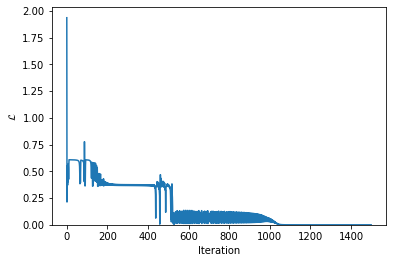

In [59]:
# Test NN

# sample = npr.rand(5)
# out = np.array([0.5,0.4])
iters = 1500
loss = np.empty(iters)

nn = MyDenseNN(5,2)
print("out before training: ", nn.fProp(sample))

for i in range(iters):
    nn.fit_sample(sample, out)
    loss[i] = nn.loss
    

print("out after training: ", nn.fProp(sample))

plt.plot(range(len(loss)), loss)
plt.ylim(0,None)
plt.xlabel("Iteration")
plt.ylabel(r"$\mathcal{L}$")

plt.show()

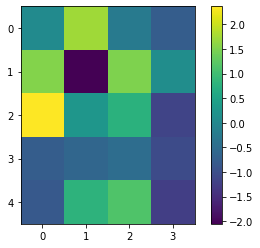

In [60]:
# Show weights

plt.imshow(nn.w1)
plt.colorbar()

plt.show()